Loading audio file...
Audio file loaded successfully.
Performing Independent Component Analysis (ICA)...
ICA completed successfully.
Saving separated audio files...
Separated audio files saved successfully.
Visualizing separated audio...


C:\Users\Nimma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\decomposition\_fastica.py:595: UserWarning: n_components is too large: it will be set to 1
  warnings.warn(
C:\Users\Nimma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\decomposition\_fastica.py:595: UserWarning: n_components is too large: it will be set to 1
  warnings.warn(


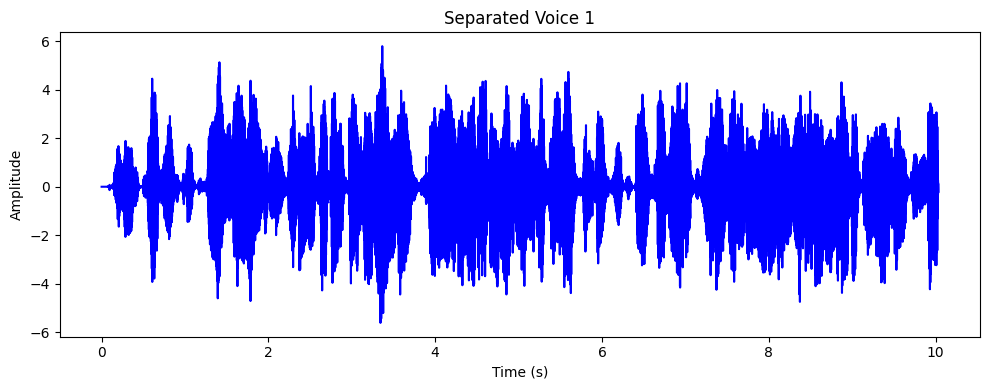

Visualization completed.
Visualizing separated audio...


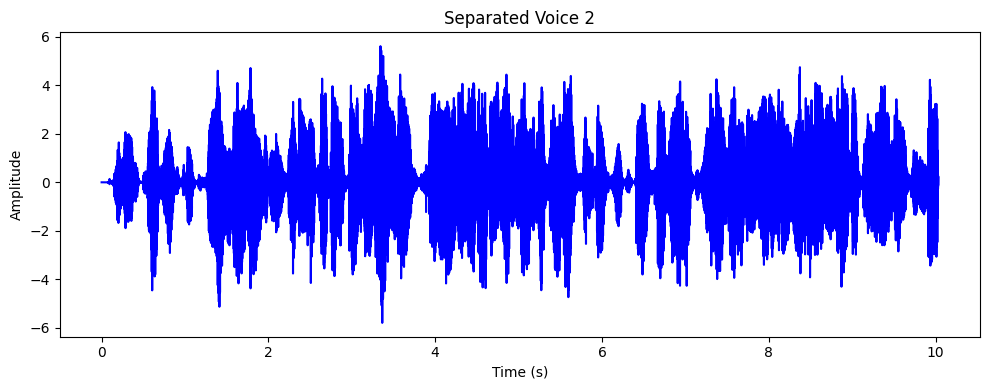

Visualization completed.
Visualizing Mel Spectrogram...


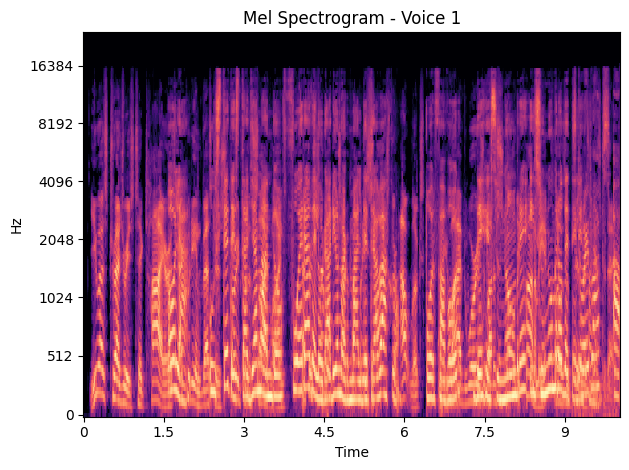

Visualization completed.
Visualizing Mel Spectrogram...


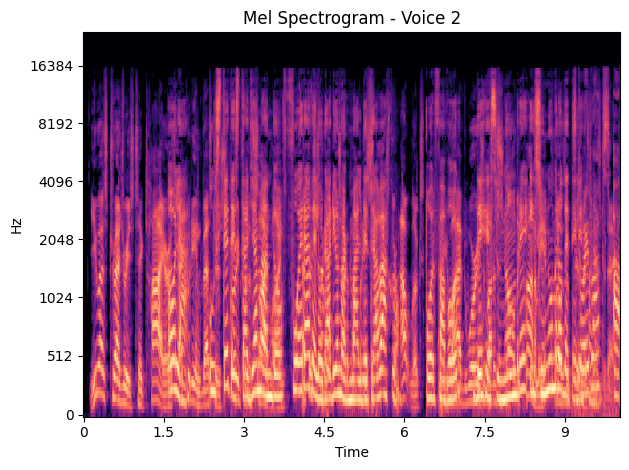

Visualization completed.


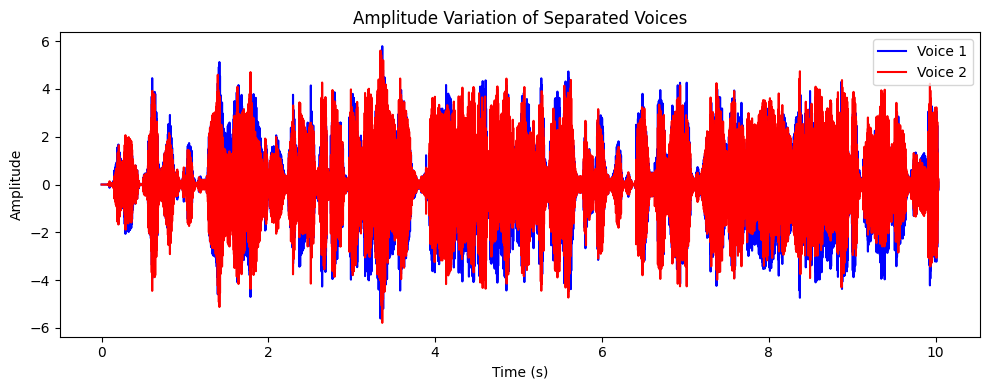

In [1]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.io import wavfile
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler

def load_audio_file(file_path):
    print("Loading audio file...")
    audio_data, sample_rate = librosa.load(file_path, sr=None, mono=False)

    # Check for NaNs or infinite values in the audio data
    if np.isnan(audio_data).any() or np.isinf(audio_data).any():
        # Handle NaNs or infinite values by replacing them with zeros
        audio_data = np.nan_to_num(audio_data)

    print("Audio file loaded successfully.")
    return audio_data, sample_rate

def perform_ica(audio_data):
    print("Performing Independent Component Analysis (ICA)...")
    # Separate stereo channels
    left_channel = audio_data[0]
    right_channel = audio_data[1]

    # Check for NaNs or infinite values in the audio data
    if np.isnan(left_channel).any() or np.isinf(left_channel).any():
        # Handle NaNs or infinite values by replacing them with zeros
        left_channel = np.nan_to_num(left_channel)
    if np.isnan(right_channel).any() or np.isinf(right_channel).any():
        # Handle NaNs or infinite values by replacing them with zeros
        right_channel = np.nan_to_num(right_channel)

    # Perform Independent Component Analysis (ICA) on each channel separately
    ica_left = FastICA(n_components=2)  # Increase the number of components if needed
    ica_right = FastICA(n_components=2)
    separated_left = ica_left.fit_transform(left_channel.reshape(-1, 1))
    separated_right = ica_right.fit_transform(right_channel.reshape(-1, 1))

    print("ICA completed successfully.")
    # Return the separated sources
    return np.hstack((separated_left, separated_right))

def save_separated_audio(separated_audio, sample_rate, output_folder):
    print("Saving separated audio files...")
    os.makedirs(output_folder, exist_ok=True)
    for i, audio in enumerate(separated_audio.T):
        output_file_path = os.path.join(output_folder, f"separated_voice_{i+1}.wav")
        wavfile.write(output_file_path, sample_rate, np.int16(audio * 32767))
    print("Separated audio files saved successfully.")

def visualize_separated_audio(separated_audio, sample_rate, title):
    print("Visualizing separated audio...")
    plt.figure(figsize=(10, 4))
    time = np.arange(len(separated_audio)) / sample_rate
    plt.plot(time, separated_audio, label='Amplitude', color='blue')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.tight_layout()
    plt.show()
    print("Visualization completed.")

def visualize_mel_spectrogram(audio_data, sample_rate, title):
    print("Visualizing Mel Spectrogram...")
    mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate, n_mels=128)
    librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), sr=sample_rate, x_axis='time', y_axis='mel')
    plt.title(title)
    plt.tight_layout()
    plt.show()
    print("Visualization completed.")

def main():
    input_audio_file = r"C:\Users\Nimma\Videos\Input_disambiguation\audio (1).wav"
    output_folder = r"C:\Users\Nimma\Videos\Output_diambiguation"

    # Load audio data
    audio_data, sample_rate = load_audio_file(input_audio_file)

    # Perform Independent Component Analysis (ICA)
    ica_result = perform_ica(audio_data)

    # Save and visualize separated voices
    save_separated_audio(ica_result, sample_rate, output_folder)
    visualize_separated_audio(ica_result[:, 0], sample_rate, title="Separated Voice 1")
    visualize_separated_audio(ica_result[:, 1], sample_rate, title="Separated Voice 2")

    # Visualize Mel Spectrograms for both voices
    visualize_mel_spectrogram(ica_result[:, 0], sample_rate, title="Mel Spectrogram - Voice 1")
    visualize_mel_spectrogram(ica_result[:, 1], sample_rate, title="Mel Spectrogram - Voice 2")

    # Visualize how the amplitude of both voices varies with time in a single graph
    plt.figure(figsize=(10, 4))
    time = np.arange(len(ica_result)) / sample_rate
    plt.plot(time, ica_result[:, 0], label='Voice 1', color='blue')
    plt.plot(time, ica_result[:, 1], label='Voice 2', color='red')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Amplitude Variation of Separated Voices')
    plt.legend()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()